In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


C:\Users\George\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [75]:
george = pd.read_csv(r"D:\Python datasets\Grab.csv")
george.head()

,date,time,booking code,pick up,drop off,ride distance,booking type,vehicle plate,fare
0,Sat 24 Sep 2016,7:42:06 pm,ADR-2135139-2-231,Asia Pacific Institute Of Information Technolo...,VISTA KOMANWEL B,2.16,GrabCar,NaN,4.0
1,Sat 1 Oct 2016,1:07:32 pm,ADR-2135139-2-232,VISTA KOMANWEL B,MID VALLEY MEGAMALL NORTH ENTRANCE,8.63,GrabCar,NaN,7.0
2,Sun 16 Oct 2016,4:34:02 pm,ADR-2135139-2-233,VISTA KOMANWEL B,SUNWAY PYRAMID,12.34,GrabCar,NaN,19.1
3,Sat 26 Nov 2016,9:06:46 am,ADR-2135139-2-241,DK SENZA,TAYLORS UNIVERSITY COLLEGE SUBANG JAYA,5.08,GrabCar,NaN,7.0
4,Fri 9 Dec 2016,8:30:59 pm,ADR-2135139-2-242,ASIA PACIFIC UNIVERSITY OF TECHNOLOGY INNOVATI...,ENDAH RIA CONDOMINIUM,3.50,GrabCar,WVP1476,6.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

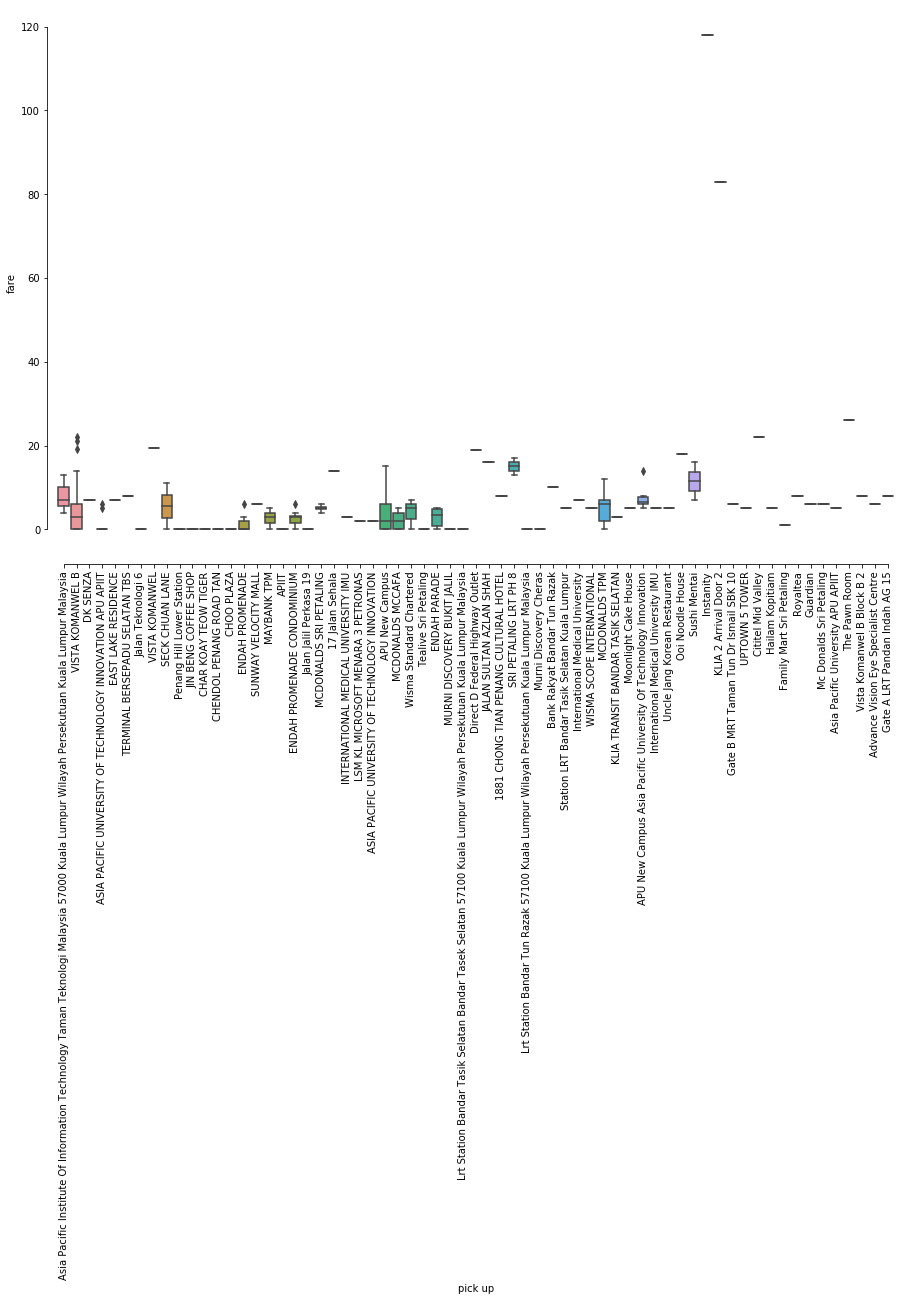

In [76]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'pick up', y = 'fare', data = george)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

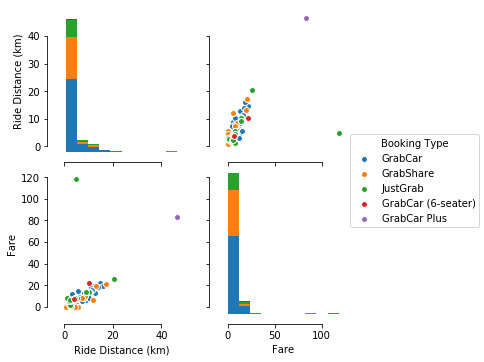

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
sns.pairplot(data = george, hue ="Booking Type")
sns.despine(offset=10, trim=True)

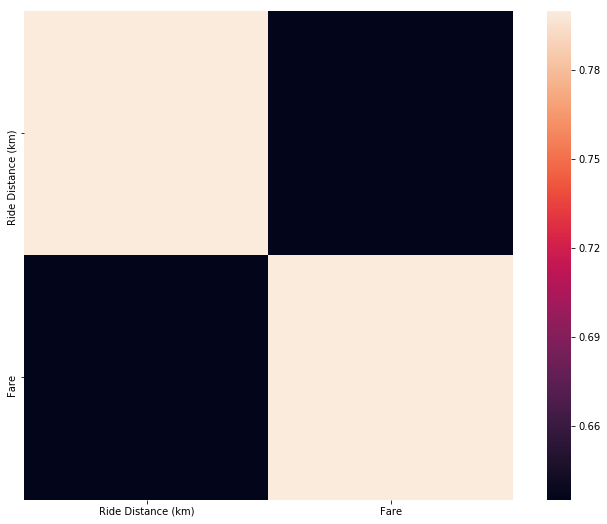

In [24]:
corrmat = george.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [77]:
george.head()

,date,time,booking code,pick up,drop off,ride distance,booking type,vehicle plate,fare
0,Sat 24 Sep 2016,7:42:06 pm,ADR-2135139-2-231,Asia Pacific Institute Of Information Technolo...,VISTA KOMANWEL B,2.16,GrabCar,NaN,4.0
1,Sat 1 Oct 2016,1:07:32 pm,ADR-2135139-2-232,VISTA KOMANWEL B,MID VALLEY MEGAMALL NORTH ENTRANCE,8.63,GrabCar,NaN,7.0
2,Sun 16 Oct 2016,4:34:02 pm,ADR-2135139-2-233,VISTA KOMANWEL B,SUNWAY PYRAMID,12.34,GrabCar,NaN,19.1
3,Sat 26 Nov 2016,9:06:46 am,ADR-2135139-2-241,DK SENZA,TAYLORS UNIVERSITY COLLEGE SUBANG JAYA,5.08,GrabCar,NaN,7.0
4,Fri 9 Dec 2016,8:30:59 pm,ADR-2135139-2-242,ASIA PACIFIC UNIVERSITY OF TECHNOLOGY INNOVATI...,ENDAH RIA CONDOMINIUM,3.50,GrabCar,WVP1476,6.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text xticklabel objects>)

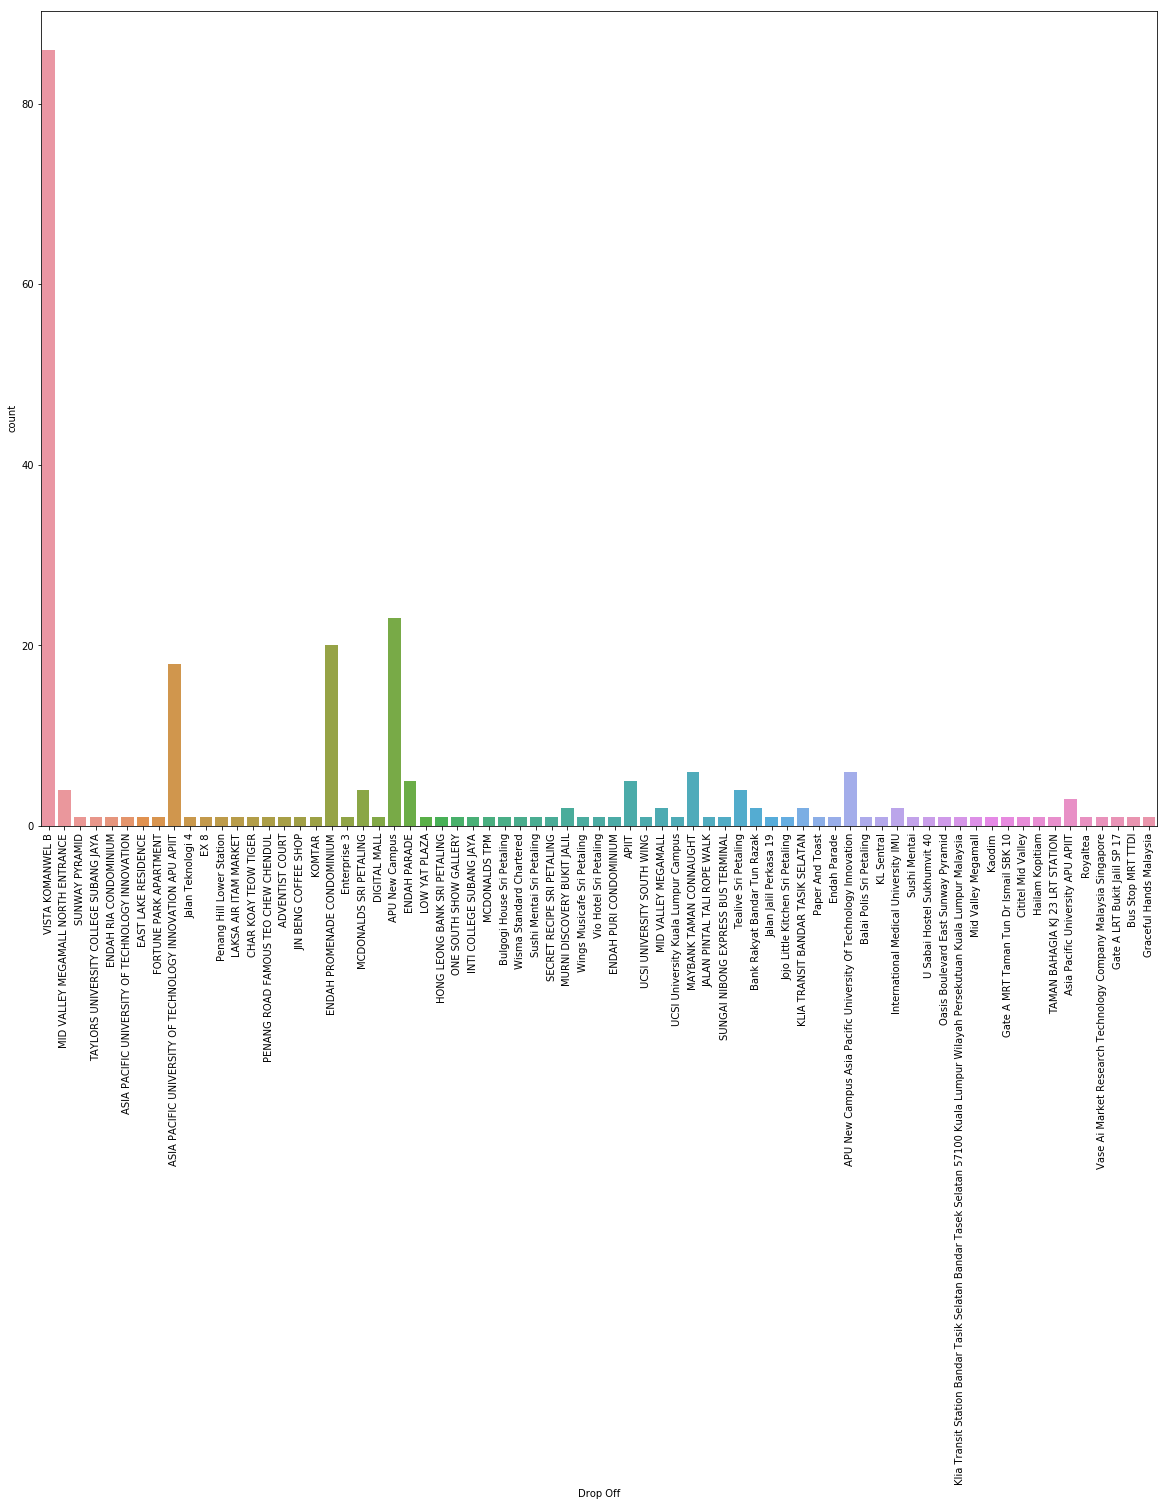

In [48]:
fig = plt.figure(figsize=(20,15))
sns.countplot(x = 'Drop Off', data = george)

plt.xticks(rotation=90)

In [49]:
df1 = george.drop(george[george['Drop Off'] != 'VISTA KOMANWEL B'].index) #back home
df2 = george.drop(george[george['Pick Up'] != 'VISTA KOMANWEL B'].index) #from home
df3 = george.drop(george[george['Drop Off'] != 'APU New Campus'].index) #to school
df1.head()

,Date,Booking Code,Pick Up,Drop Off,Ride Distance (km),Booking Type,Vehicle Plate,Fare
0,"Sat 24 Sep 2016, 7:42:06 pm",ADR-2135139-2-231,Asia Pacific Institute Of Information Technolo...,VISTA KOMANWEL B,2.16,GrabCar,NaN,4.0
8,"Mon 12 Dec 2016, 11:30:02 am",ADR-2135139-2-247,EAST LAKE RESIDENCE,VISTA KOMANWEL B,5.39,GrabCar,NaN,7.0
12,"Wed 22 Feb 2017, 3:28:57 pm",ADR-2135139-2-256,ASIA PACIFIC UNIVERSITY OF TECHNOLOGY INNOVATI...,VISTA KOMANWEL B,2.40,GrabCar,MCB8343,0.0
16,"Thu 23 Feb 2017, 2:17:48 pm",ADR-2135139-2-261,ASIA PACIFIC UNIVERSITY OF TECHNOLOGY INNOVATI...,VISTA KOMANWEL B,2.40,GrabCar,NaN,0.0
19,"Tue 28 Feb 2017, 2:53:43 pm",ADR-2135139-2-268,ASIA PACIFIC UNIVERSITY OF TECHNOLOGY INNOVATI...,VISTA KOMANWEL B,2.40,GrabCar,NaN,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

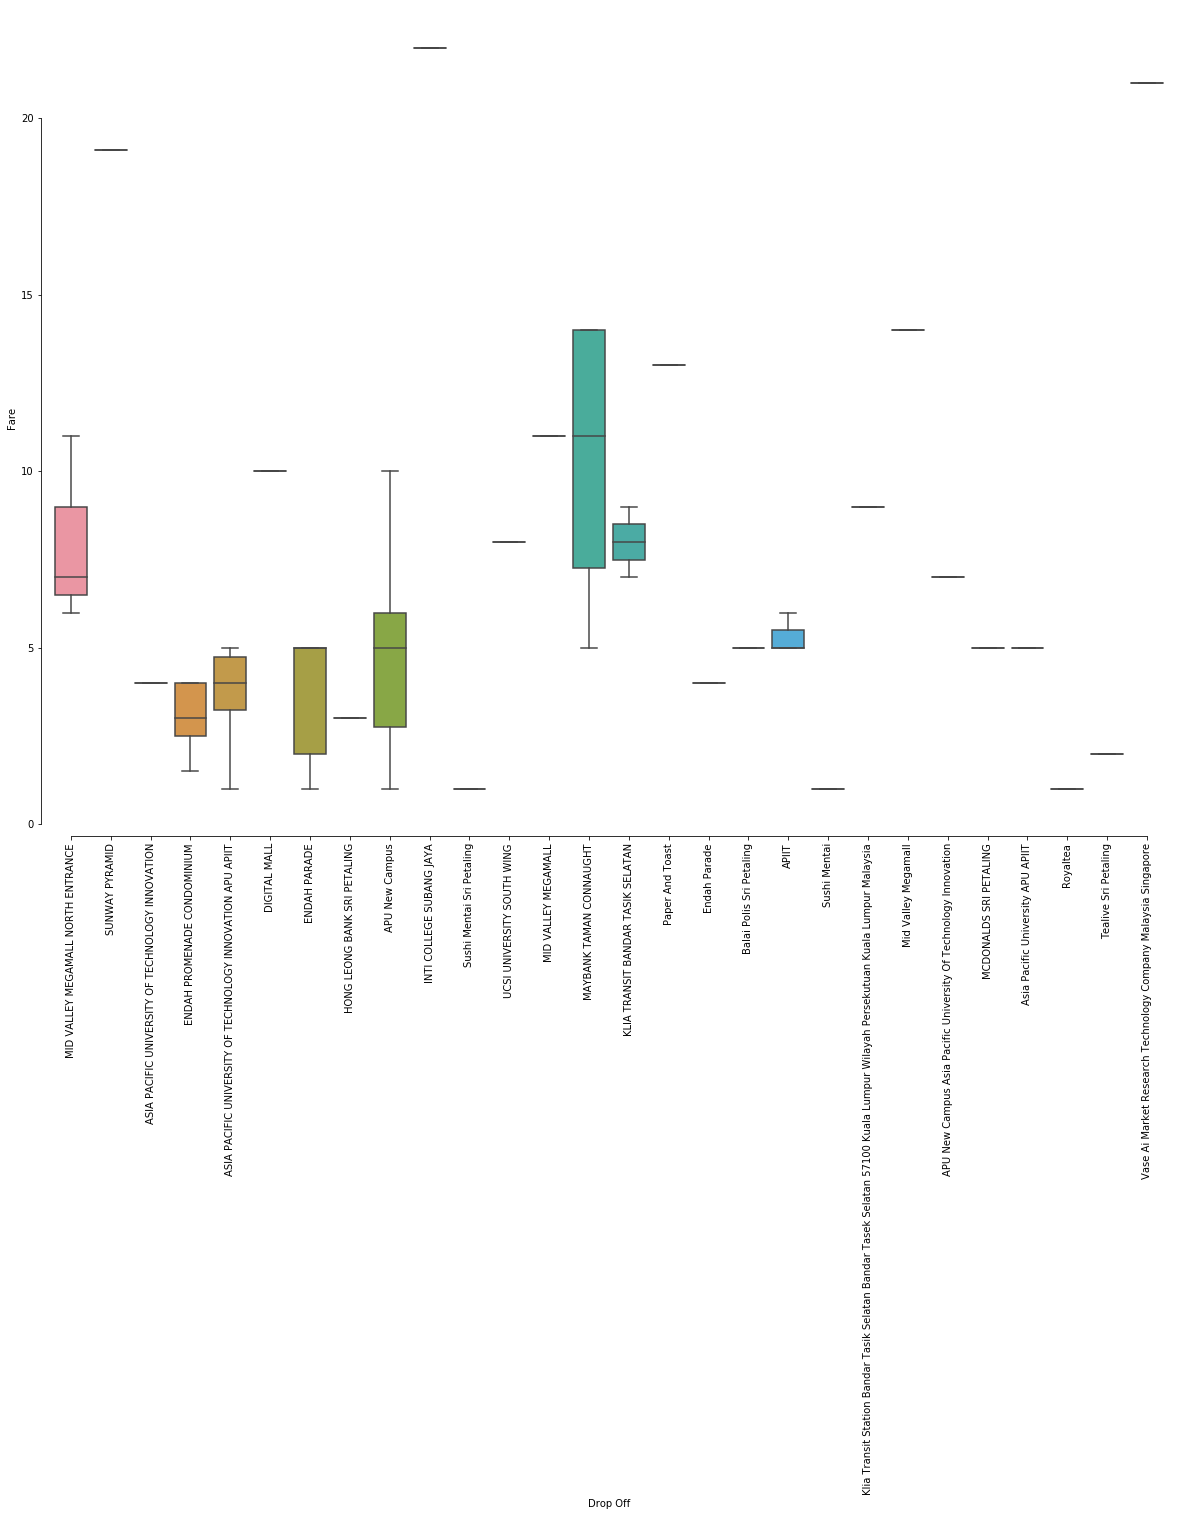

In [50]:
df = df2[df2['Fare'] > 0]
%matplotlib inline
fig = plt.figure(figsize=(20,15))
sns.boxplot(x = 'Drop Off', y = 'Fare', data = df)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

In [53]:
df1.Fare.describe()

count    86.000000
mean      3.604651
std       3.863187
min       0.000000
25%       0.000000
50%       3.000000
75%       5.000000
max      26.000000
Name: Fare, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

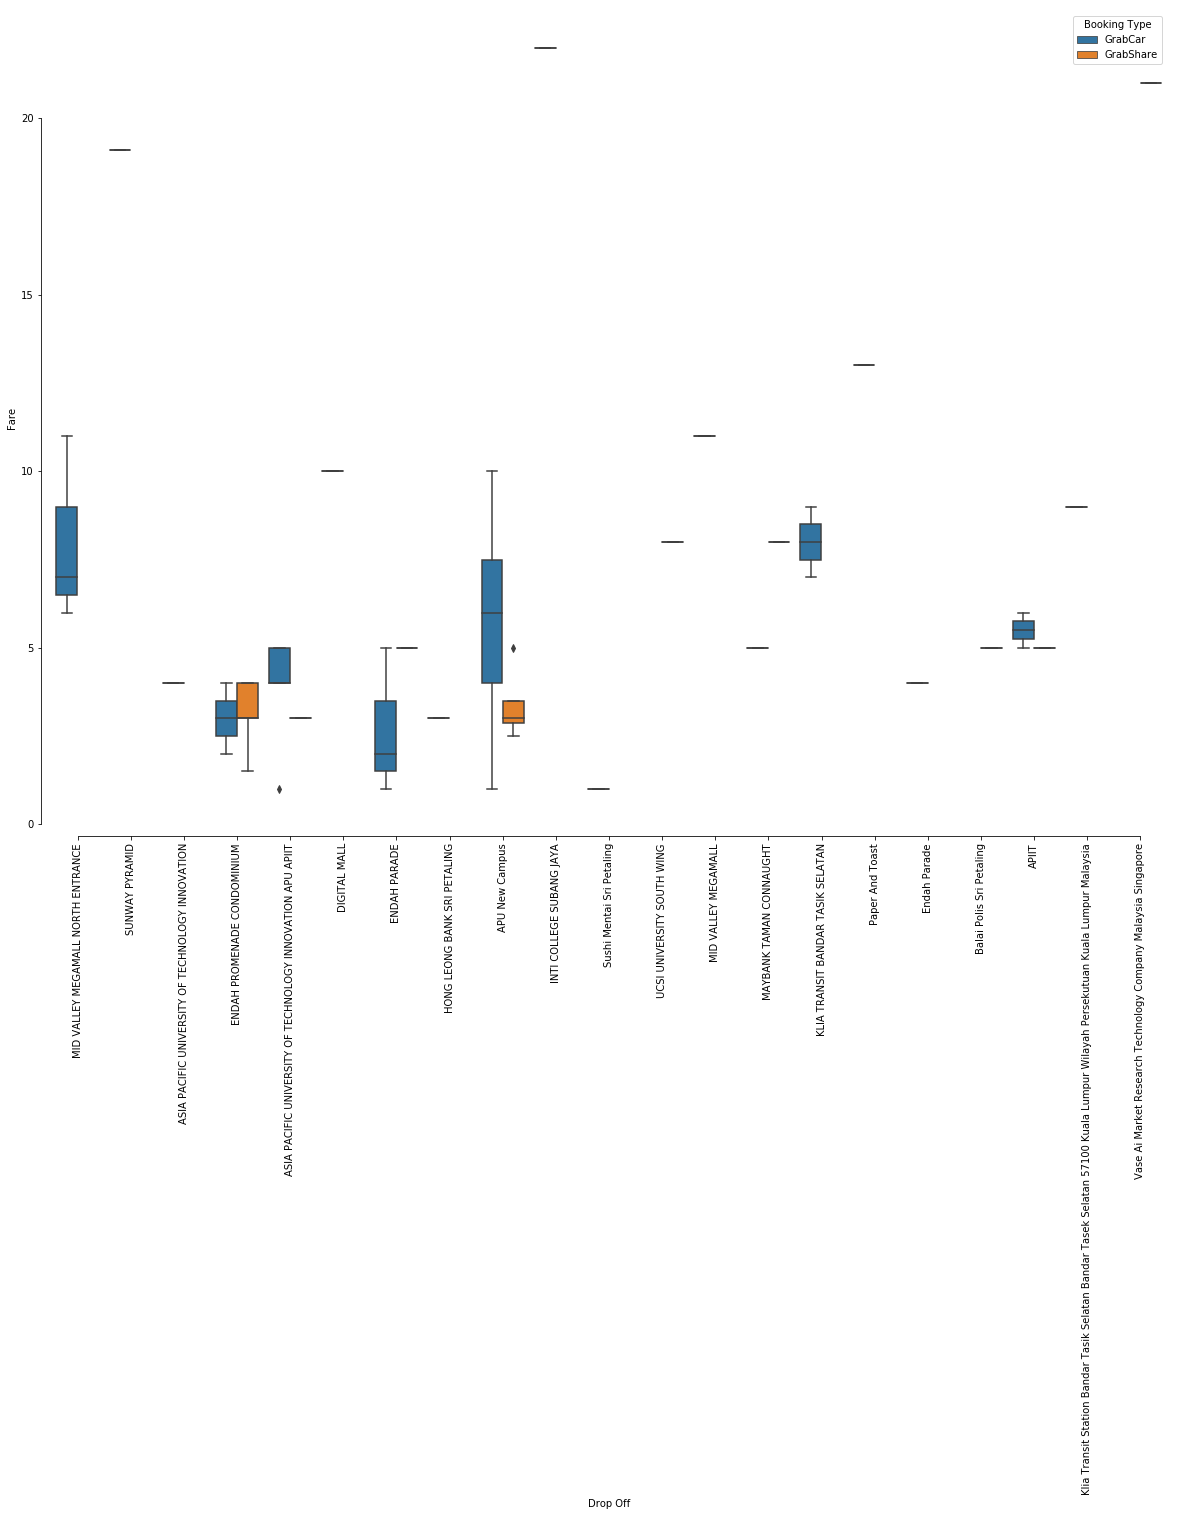

In [66]:
df4 = df2[df2['Fare'] > 0] #Back Home
df5 = df4[df4['Booking Type'].isin(['GrabCar', 'GrabShare'])]
%matplotlib inline
fig = plt.figure(figsize=(20,15))
sns.boxplot(x = 'Drop Off', y = 'Fare', data = df5, hue = 'Booking Type')
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

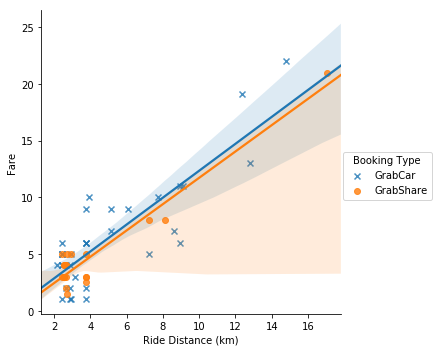

In [73]:
sns.lmplot(x = 'Ride Distance (km)', y = 'Fare', hue = "Booking Type",markers = ['x','o'], data = df5) 